# Preprocessing

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [7]:
df.shape

(37249, 2)

In [8]:
df.sample()['clean_comment'].values

array(['thanks for doing this every week nice view the important stuff missed '],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [10]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [11]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [12]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(350)

In [15]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [19]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [20]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

<ipython-input-20-1116112851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].str.lower()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [21]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [22]:
# Remove trailing and leading whitespaces form the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [27]:
  # Identify comments containing URLs
url_pattern = r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()

<ipython-input-27-1714414448>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]


,clean_comment,category
448,what missing jpg.and why this brilliant edit t...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
1354,amsa press conference australian maritime safe...,1
1663,overall.nda 340 ± upa ± others 133 ± bjp 291 ±...,0


In [28]:
# Identify comments containing new line characters
comments_with_newlines = df[df['clean_comment'].str.contains('\n')]

comments_with_newlines.head()

,clean_comment,category


In [29]:
# Replace new line characters with period (.) in the clean_comment column
df['clean_comment'] = df['clean_comment'].str.replace('\n', '.')

# Verify the transformation by checking for any remaining new line characters
df['clean_comment'].str.contains('\n').sum()

np.int64(0)

# EDA

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

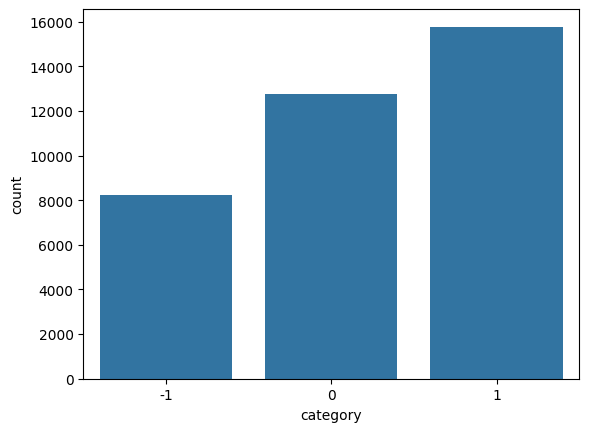

In [31]:
# Distribution of classes
sns.countplot(data=df, x='category')

In [32]:
# Frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(4)

,proportion
category,
1,42.8641
0,34.7131
-1,22.4227


In [33]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [34]:
df.sample(10)

,clean_comment,category,word_count
3754,the only thing see high impact pulse rifle,1,8
724,time for some fun sanjay jha defending congress,1,8
19903,lol this soo good,1,4
31341,lovely beautiful tones gold yellow and red bea...,1,8
22834,remaining modi,0,2
16996,just going leave this here one year demonetisa...,1,15
9155,just got lot weirder get ready for chicago hot...,1,88
785,did you adopt the karl rove strategy making qu...,0,45
22795,overly attached girlfriend kejriwal,0,4
10616,nota,0,1


In [35]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.646645
std,56.648801
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


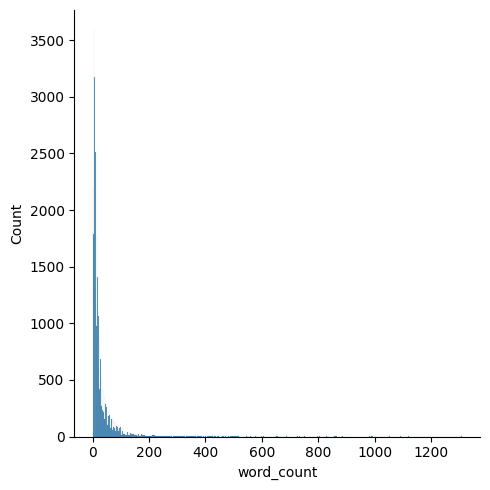

In [36]:
sns.displot(df['word_count'])

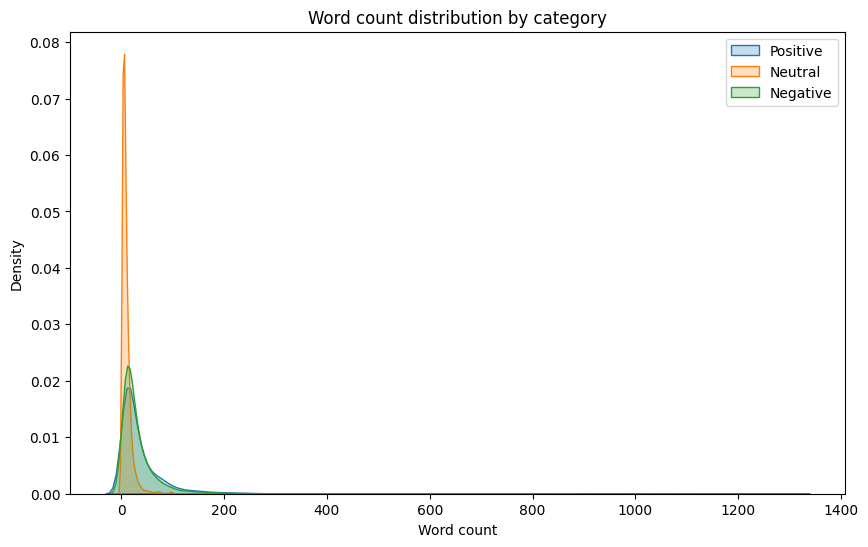

In [37]:
# Create the figure and axes
plt.figure(figsize=(10,6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word count distribution by category')
plt.xlabel('Word count')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

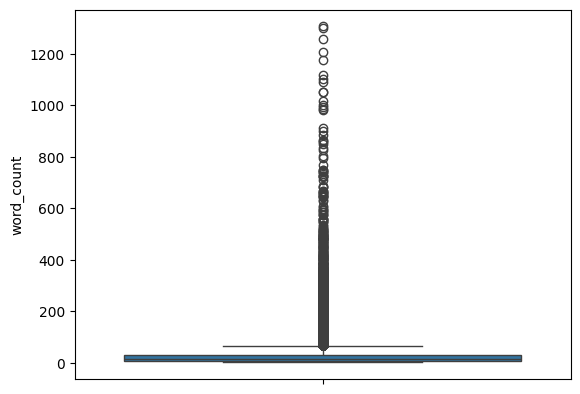

In [38]:
sns.boxplot(df['word_count'])

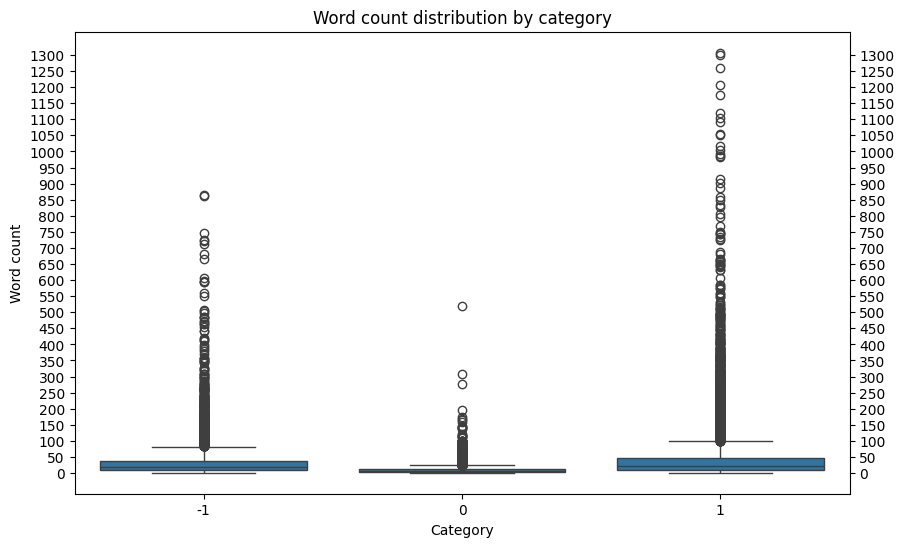

In [50]:
# Create a boxplot for the 'word_count' column categorized by 'category'
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='word_count', data=df)

# Add title and labels
plt.title('Word count distribution by category')
plt.xlabel('Category')
plt.ylabel('Word count')

# Set y-axis ticks
plt.yticks(range(0, int(df['word_count'].max()) + 1, 50))

# Add ticks to both sides of the y-axis
plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True)

plt.show()

**Positive comments**: The median word count is relatively high, and there are several outliers with longer comments, indicating that possitive comments tend to be more verbose.

**Neutral comments**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.

**Negative comments**: The word count distribution is similar to possitive comments but with a slightly lower median and fewer extreme outliers.

Text(0, 0.5, 'Word count')

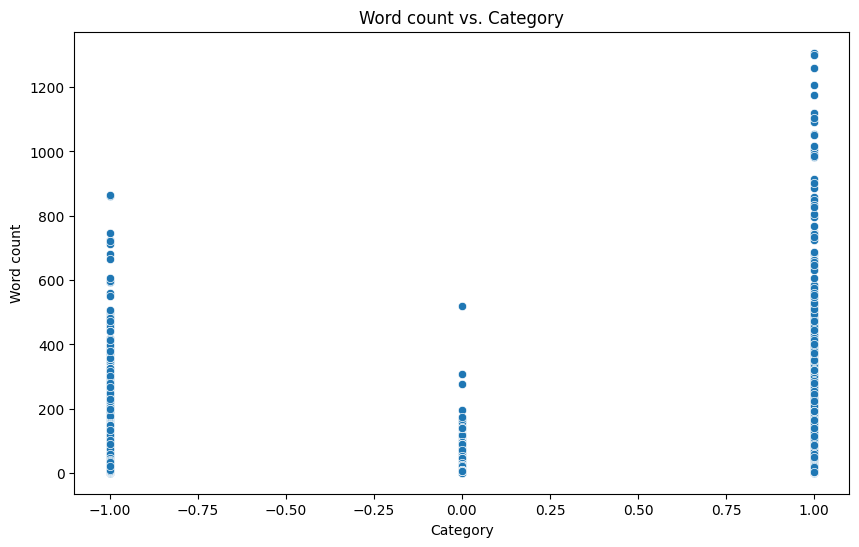

In [54]:
# Create a scatterplot between category and word_count
plt.figure(figsize=(10,6))
sns.scatterplot(x='category', y='word_count', data=df)

# Add title and labels
plt.title('Word count vs. Category')
plt.xlabel('Category')
plt.ylabel('Word count')

<Axes: xlabel='category', ylabel='word_count'>

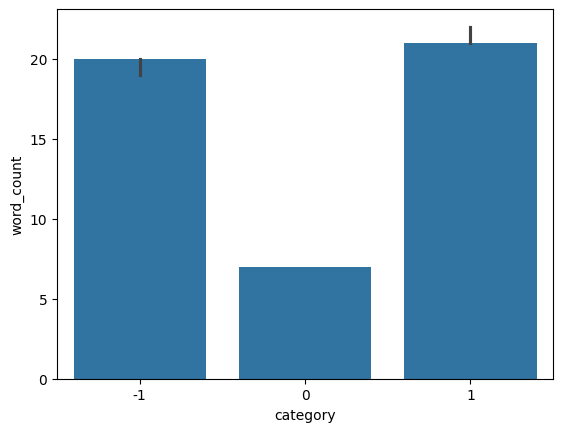

In [56]:
# Median word counts among sentiments
sns.barplot(x='category', y='word_count', data=df, estimator='median')

<Axes: xlabel='category', ylabel='word_count'>

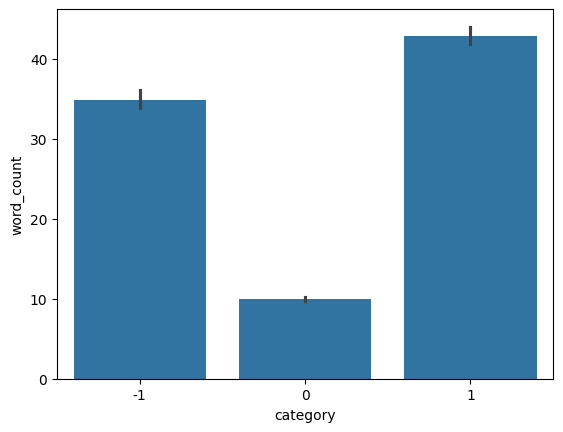

In [57]:
# Mean word counts among sentiments
sns.barplot(x='category', y='word_count', data=df, estimator='mean')

In [58]:
!pip install nltk

In [61]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: sum(1 for word in x.split() if word in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Display the updated DataFrame
df.sample(5)

,clean_comment,category,word_count,num_stop_words
20912,kiek visur teko gorsėti buvo daug sutrikimų el...,0,21,0
11784,audioblog rahul deshpande marathi and classica...,0,11,1
19982,rss leaning republic out the open now,0,7,3
28196,think the narrative has gotten twisted lot her...,1,255,97
26213,dont care either way she still sexy hell,1,8,1


Text(0, 0.5, 'Frequency')

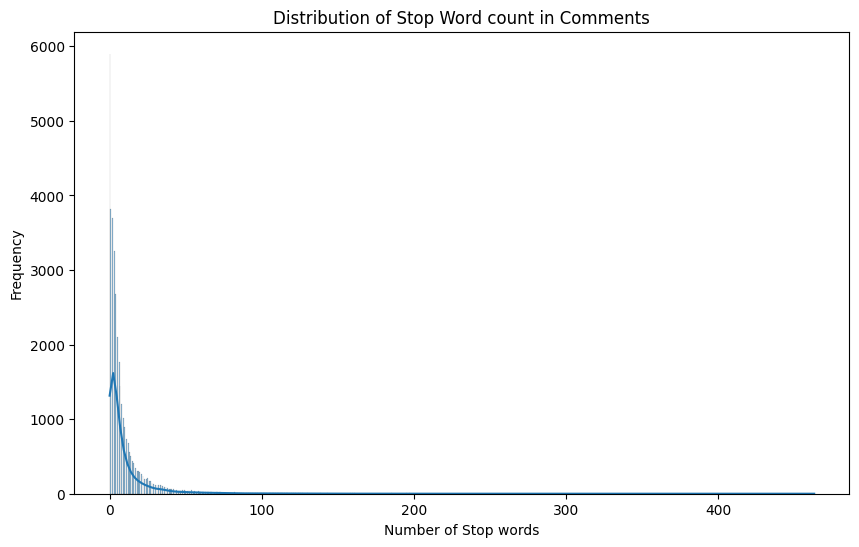

In [67]:
# Create a histplot for the 'num_stop_words' column
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'], kde=True)

# Add title and labels
plt.title('Distribution of Stop Word count in Comments')
plt.xlabel('Number of Stop words')
plt.ylabel('Frequency')

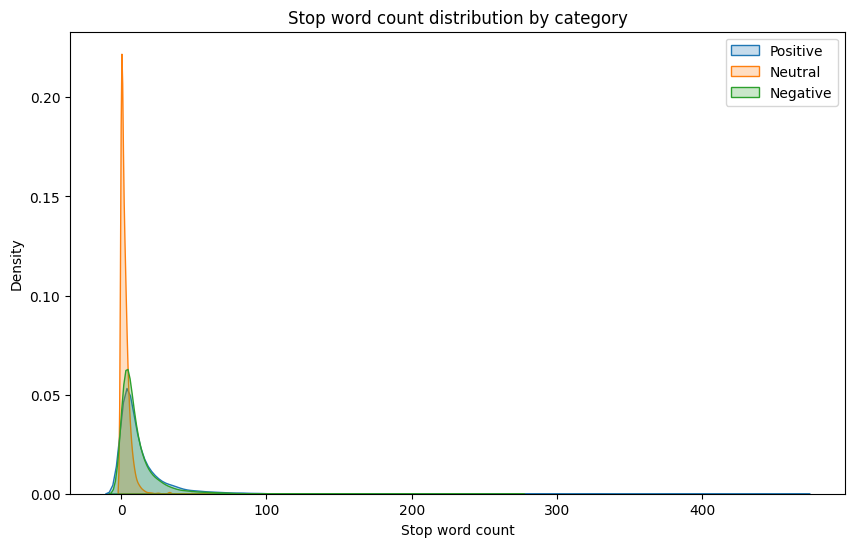

In [68]:
# Plot KDE for each category
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Stop word count distribution by category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

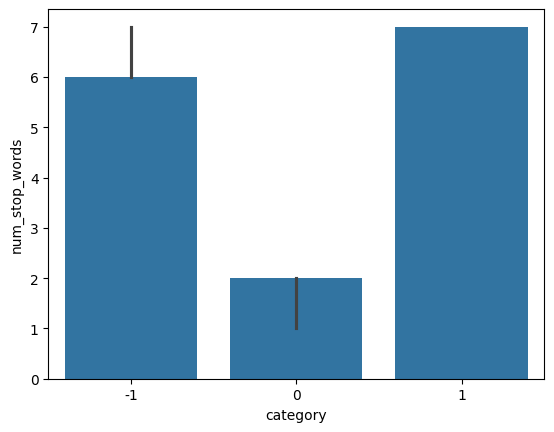

In [69]:
# Median word counts among sentiments
sns.barplot(x='category', y='num_stop_words', data=df, estimator='median')

<ipython-input-70-81682587>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='stop_word', data=top_stop_words_df, palette='viridis')


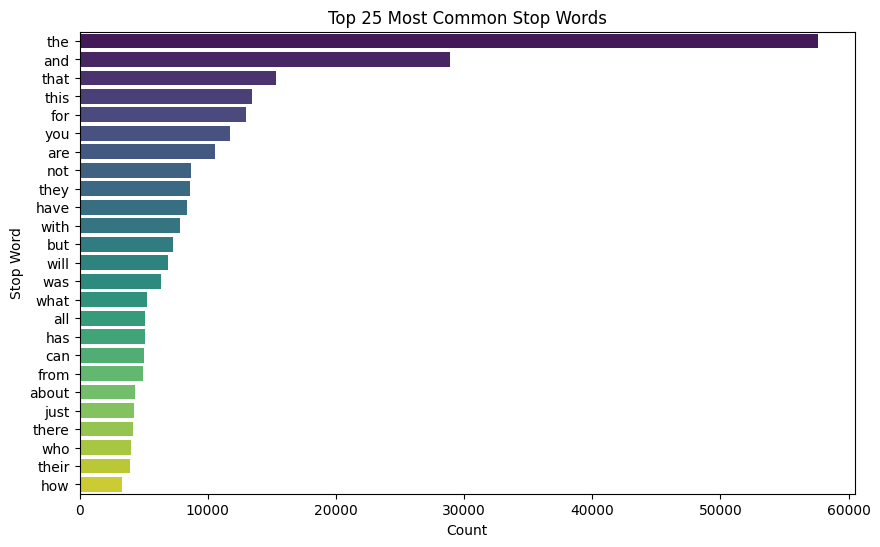

In [70]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'stop_words'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_stop_words_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top most common stop words
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='stop_word', data=top_stop_words_df, palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [71]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [72]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [95]:
from collections import Counter

# Combine all comments into one larger string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_counts = Counter(all_text)

# Convert the character count into a DataFrame for better display
char_counts_df = pd.DataFrame(char_counts.items(), columns=['character', 'count'])

# Sort the DataFrame by count in descending order
char_counts_df = char_counts_df.sort_values(by='count', ascending=False)

In [96]:
char_counts_df['character'].values

array([' ', 'e', 't', ..., 'ബ', '统', '☝'], dtype=object)

In [97]:
char_counts_df.tail(10)

,character,count
809,值,1
810,纸,1
1373,ജ,1
1374,ണ,1
1375,р,1
323,ï,1
326,ഡ,1
338,ബ,1
1347,统,1
1348,☝,1


In [98]:
import string

# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

df.sample(10)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
35216,when the same jokes doesn work for fucking years,-1,9,5,48,0
24740,stop fighting dead enemies and stop fighting f...,-1,34,12,212,0
14711,btw advani was looking like dolan character ag...,0,14,2,85,0
31732,oooooooooooh remember this chutiya was the one...,1,19,6,120,0
33096,what the frequency which you should submit tha...,0,11,7,67,0
15918,the fucking irony all these motherfucking nris...,1,62,25,366,0
4896,the scam which started during congres regime b...,1,44,8,278,1
32630,marketing 101,0,2,0,13,0
14664,hadden best wat research kunnen doen juiste ma...,1,25,0,145,0
30328,imagine kratos holding his hand out call the a...,0,22,7,120,0


In [100]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.000000
mean,0.043487
std,1.013853
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,136.000000


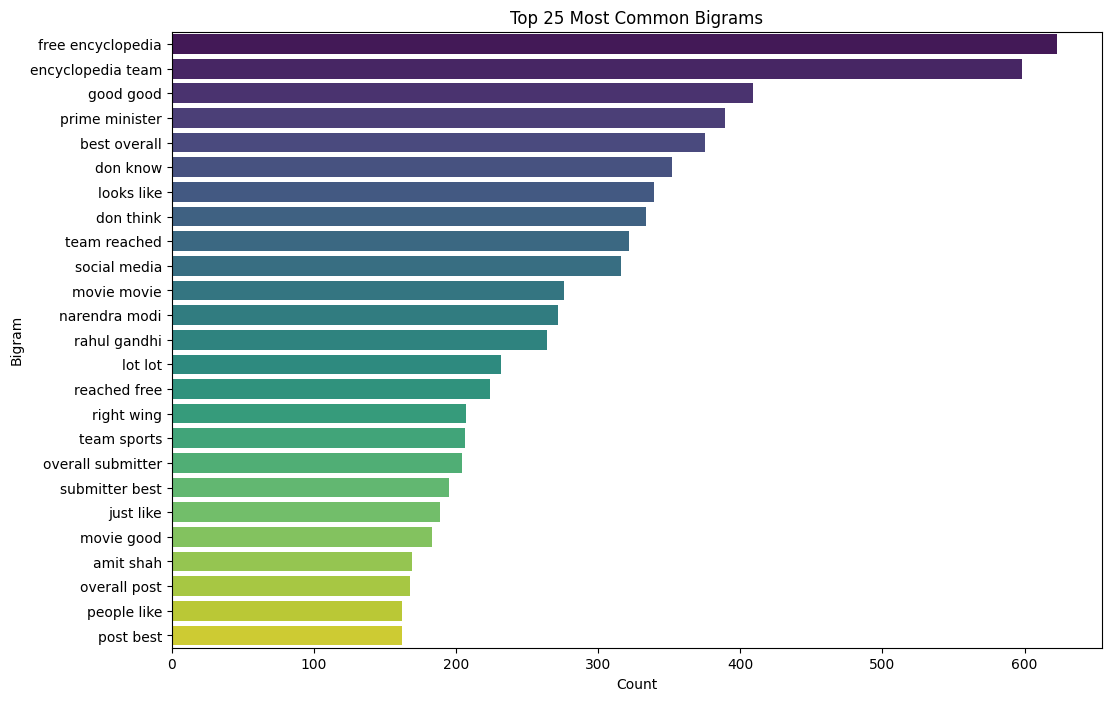

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top bigrams
def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):
  vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 bigrams
top_bigrams = get_top_ngrams(df['clean_comment'], n=25)

# Convert the top bigrams to a DataFrame for plotting
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='bigram', data=top_bigrams_df, palette='viridis')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

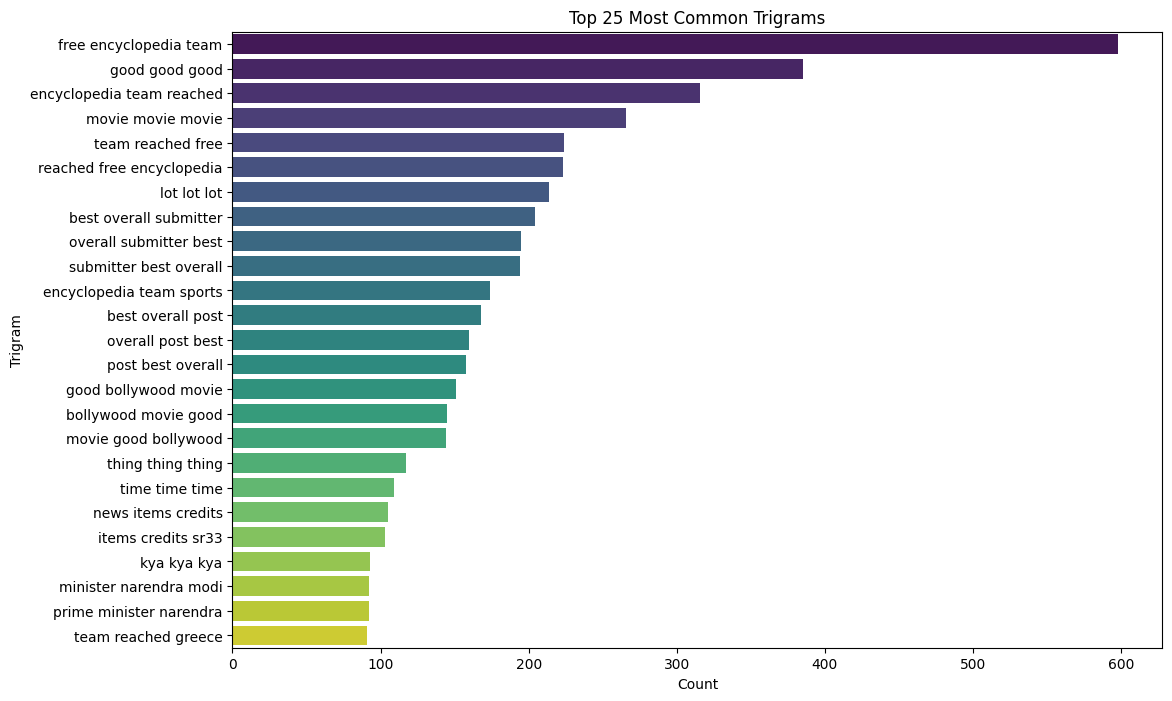

In [105]:
# Get the top 25 trigrams
top_trigrams = get_top_ngrams(df['clean_comment'], n=25, ngram_range=(3,3))

# Convert to DF for plotting
top_trigrams_df = pd.DataFrame(top_trigrams, columns=['trigram', 'count'])

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='trigram', data=top_trigrams_df, palette='viridis')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [106]:
# Remove non-English characters from the 'clean_comment' column
# keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s.,!?;:()-]', '', str(x)))

In [110]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_counts = Counter(all_text)

# Convert the character count into a DataFrame for better display
char_counts_df = pd.DataFrame(char_counts.items(), columns=['character', 'count'])

# Sort the DataFrame by count in descending order
char_counts_df = char_counts_df.sort_values(by='count', ascending=False)

char_counts_df

,character,count
6,,1090821
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [111]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [117]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis\
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

In [118]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [120]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
    )

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


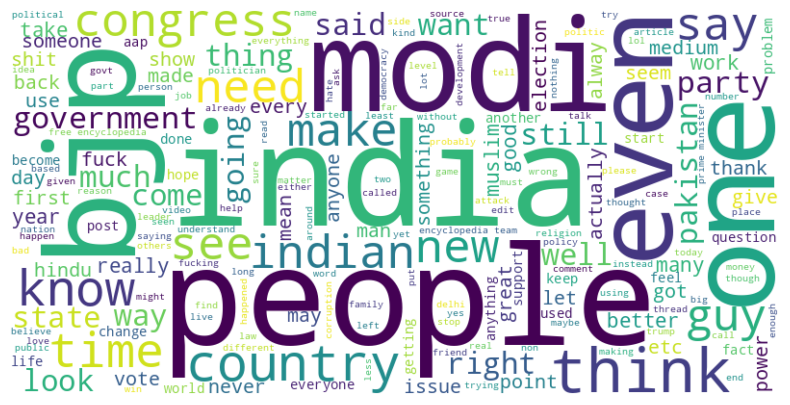

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

plot_word_cloud(df['clean_comment'])

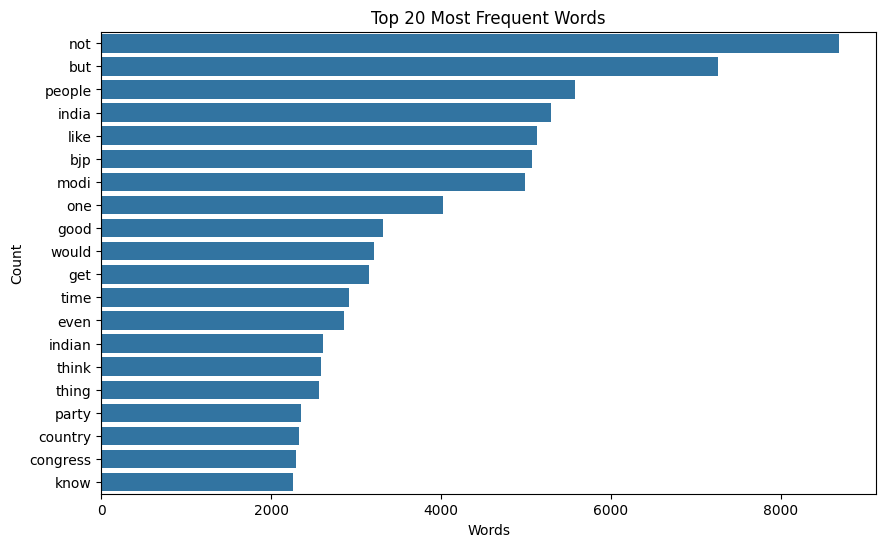

In [128]:
def plot_top_n_words(df, n=20):
  """Plot the top N most frequent words in the dataset."""
  # Flatten all words in the content column
  words = ' '.join(df['clean_comment']).split()

  # Get the top N most common words
  word_counts = Counter(words)
  most_common_words = word_counts.most_common(n)

  # Extract the words and their counts
  words, counts = zip(*most_common_words)

  # Create a bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(x=list(counts), y=list(words))
  plt.xlabel('Words')
  plt.ylabel('Count')
  plt.title(f'Top {n} Most Frequent Words')
  plt.show()

# Example usage
plot_top_n_words(df, n=20)

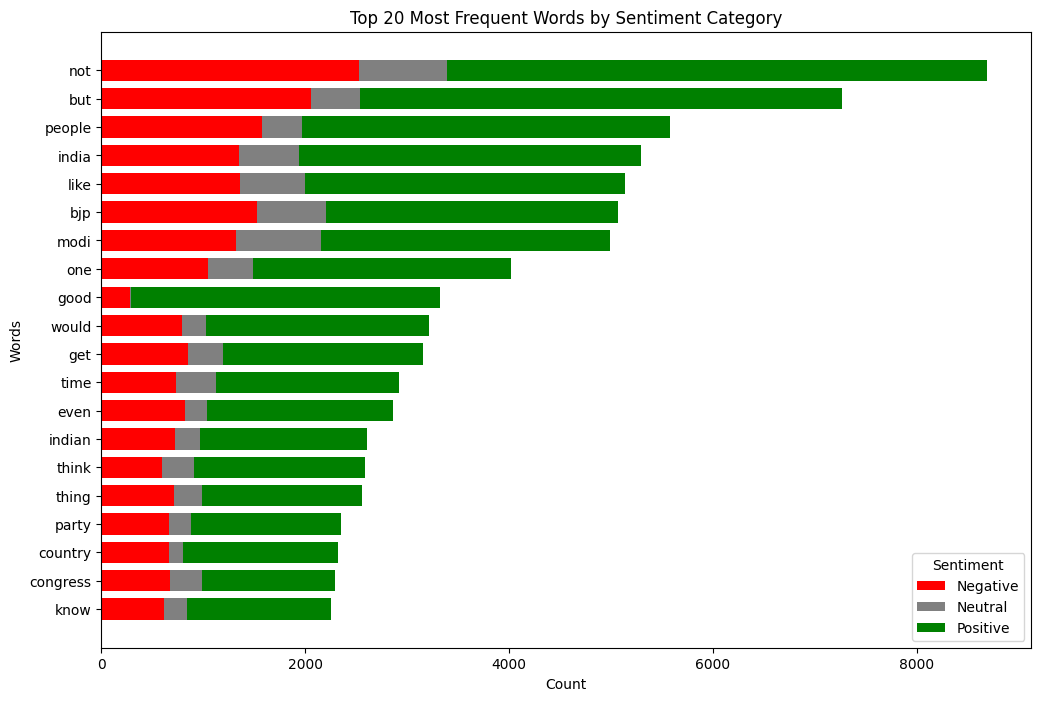

In [135]:
def plot_top_n_words_by_category(df, n=20, start=0):
  """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
  # Flatten all words in the content column and count their occurrences by category
  word_category_counts = {}

  for idx, row in df.iterrows():
    words = row['clean_comment'].split()
    category = row['category']

    for word in words:
      if word not in word_category_counts:
        word_category_counts[word] = {-1: 0, 0: 0, 1: 0} # Initialize counts for each sentiment category

      # Increment the count for the corresponding sentiment category
      word_category_counts[word][category] += 1

  # Get total counts across all categories for each word
  total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

  # Get the top N most frequent words across all categories
  most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
  top_words = [word for word, _ in most_common_words]

  # Prepare data for plotting
  word_labels = top_words
  negative_counts = [word_category_counts[word][-1] for word in top_words]
  neutral_counts = [word_category_counts[word][0] for word in top_words]
  positive_counts = [word_category_counts[word][1] for word in top_words]

  # Plot the stacked bar chart
  plt.figure(figsize=(12, 8))
  bar_width = 0.75

  # Plot negative, neutral, and positive counts in a stacked manner
  plt.barh(word_labels, negative_counts, color='red', label='Negative', height=bar_width)
  plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral', height=bar_width)
  plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive', height=bar_width)

  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.title(f'Top {n} Most Frequent Words by Sentiment Category')
  plt.legend(title='Sentiment', loc='lower right')
  plt.gca().invert_yaxis() # Invert y-axis to show the highest count at the top
  plt.show()

plot_top_n_words_by_category(df, n=20)